<a href="https://colab.research.google.com/github/sun-fox/GluonCV-Mxnet/blob/master/GluonCV_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mxnet-cu101mkl
!pip install gluoncv

     |████████████████████████████████| 711.0MB 24kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 757kB 2.8MB/s 


In [0]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [4]:
image_url = "https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg"
image_filepath = 'dog.jpg'
gcv.utils.download(url=image_url, path=image_filepath)

  0%|          | 0/160 [00:00<?, ?KB/s]

100%|██████████| 160/160 [00:00<00:00, 3548.33KB/s]


'dog.jpg'

In [6]:
image = mx.image.imread('dog.jpg')
print('type',type(image))
print('type',image.shape)
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

type <class 'mxnet.ndarray.ndarray.NDArray'>
type (576, 768, 3)
minimum value: 0
maximum value: 255


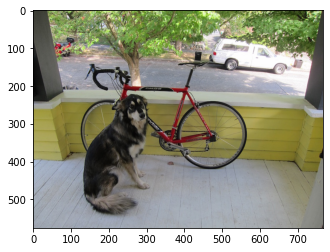

In [8]:
plt.imshow(image.asnumpy())

In [10]:
image, chw_image = gcv.data.transforms.presets.yolo.transform_test(image,short=512)
print('type',type(image))
print('type',image.shape)
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

type <class 'mxnet.ndarray.ndarray.NDArray'>
type (1, 3, 512, 683)
minimum value: -2.117904
maximum value: 2.64


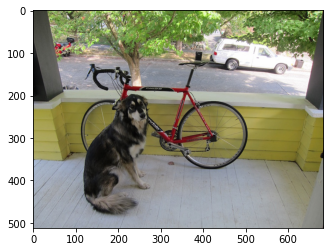

In [18]:
plt.imshow(chw_image)

In [13]:
network=gcv.model_zoo.get_model('yolo3_darknet53_coco',pretrained=True)

100%|██████████| 224190/224190 [00:04<00:00, 49199.82KB/s]


In [0]:
prediction = network(image)

In [20]:
type(prediction)

tuple

In [23]:
for index,array in enumerate(prediction):
  print('#{} shape: {}'.format(index+1,array.shape))

#1 shape: (1, 100, 1)
#2 shape: (1, 100, 1)
#3 shape: (1, 100, 4)


In [0]:
prediction = [array[0] for array in prediction]

In [0]:
class_indices,probabilities, bounding_boxes = prediction

In [32]:
k = 10 
print(class_indices[:k])


[[16.]
 [ 1.]
 [ 7.]
 [ 2.]
 [13.]
 [ 0.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
<NDArray 10x1 @cpu(0)>


In [33]:
print(probabilities[:k])


[[ 0.9919528 ]
 [ 0.9600399 ]
 [ 0.62269694]
 [ 0.29241997]
 [ 0.01795173]
 [ 0.01141722]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
<NDArray 10x1 @cpu(0)>


In [34]:
print(bounding_boxes[:k])


[[116.53647  201.33235  281.90323  482.09094 ]
 [ 93.92975  107.73944  504.75128  375.75415 ]
 [416.78833   69.800644 615.01794  148.89009 ]
 [416.78833   69.800644 615.01794  148.89009 ]
 [ 90.88356  125.878815 504.4449   402.7955  ]
 [532.78235   91.84185  547.3104   104.69111 ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]]
<NDArray 10x4 @cpu(0)>


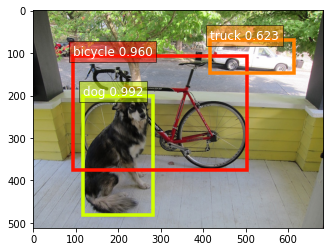

In [36]:
gcv.utils.viz.plot_bbox(chw_image,bounding_boxes,probabilities,class_indices,class_names=network.classes)